In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cca_zoo.models import CCA

# 数据描述

In [74]:
data = pd.read_csv("Preprocess Data\第二问.csv").iloc[:,[2,3,4,7,8]]
data

,覆盖面积/万亩,降水量(mm),最大能见度,平均最大瞬时风速(knots),降尘量吨/月
0,88.11,870.71,19.15,28.69,21.90
1,89.85,649.22,18.35,28.01,20.00
2,91.54,791.97,18.35,28.68,12.30
3,93.15,463.30,18.02,26.72,16.40
4,94.65,841.25,17.70,25.64,15.20
5,96.02,49.02,16.42,24.85,14.95
6,97.22,434.59,16.09,25.95,15.43
7,98.23,448.56,19.15,27.65,15.18
8,99.00,443.99,16.90,26.25,13.23
9,99.58,471.17,16.58,25.69,11.98


In [75]:
data.corr(method='pearson')

,覆盖面积/万亩,降水量(mm),最大能见度,平均最大瞬时风速(knots),降尘量吨/月
覆盖面积/万亩,1.000000,0.016729,-0.468653,-0.852724,-0.928601
降水量(mm),0.016729,1.000000,-0.120975,0.075588,-0.095220
最大能见度,-0.468653,-0.120975,1.000000,0.517947,0.545101
平均最大瞬时风速(knots),-0.852724,0.075588,0.517947,1.000000,0.807380
降尘量吨/月,-0.928601,-0.095220,0.545101,0.807380,1.000000


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

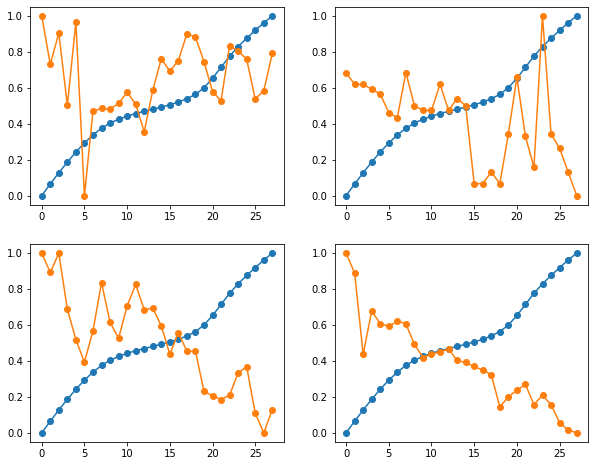

In [78]:
# 森林覆盖面积与因素的折线图
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].plot(data[:,0],'-o')
ax[0,0].plot(data[:,1],'-o')

ax[0,1].plot(data[:,0],'-o')
ax[0,1].plot(data[:,2],'-o')

ax[1,0].plot(data[:,0],'-o')
ax[1,0].plot(data[:,3],'-o')

ax[1,1].plot(data[:,0],'-o')
ax[1,1].plot(data[:,4],'-o')

- Pearson 相关系数以及典型相关分析都要求样本数据满足正态分布的要求
- 因此，我们首先对样本数据的正态分布进行检验

In [81]:
from scipy import stats
# Statstic: 代表显著性水平
# P: 代表概率论与数理统计中的P值
shapiro_test = stats.shapiro(data[:,0])
print("Shapiro wilk Test Statstic:{}   Pvalue:{}".format(shapiro_test.statistic,shapiro_test.pvalue))
shapiro_test = stats.shapiro(data[:,1])
print("Shapiro wilk Test Statstic:{}   Pvalue:{}".format(shapiro_test.statistic,shapiro_test.pvalue))
shapiro_test = stats.shapiro(data[:,2])
print("Shapiro wilk Test Statstic:{}   Pvalue:{}".format(shapiro_test.statistic,shapiro_test.pvalue))
shapiro_test = stats.shapiro(data[:,3])
print("Shapiro wilk Test Statstic:{}   Pvalue:{}".format(shapiro_test.statistic,shapiro_test.pvalue))
shapiro_test = stats.shapiro(data[:,4])
print("Shapiro wilk Test Statstic:{}   Pvalue:{}".format(shapiro_test.statistic,shapiro_test.pvalue))

Shapiro wilk Test Statstic:0.974230945110321   Pvalue:0.697206974029541
Shapiro wilk Test Statstic:0.9344239234924316   Pvalue:0.07976467162370682
Shapiro wilk Test Statstic:0.9483016133308411   Pvalue:0.1795463114976883
Shapiro wilk Test Statstic:0.9761701822280884   Pvalue:0.7509426474571228
Shapiro wilk Test Statstic:0.9653383493423462   Pvalue:0.46256113052368164


In [89]:
import statsmodels.api as sm

label_train = data[:, 0].reshape(-1,1)
factor_train = data[:,2:]

Y=label_train
X=factor_train
X=sm.add_constant(X) # 添加截距项

In [90]:
model = sm.OLS(Y,X).fit()

In [91]:
from scipy.stats import f,t
F_Theroy = f.ppf(q=0.95,dfn = 4,dfd = 30-4-1)
print('F: {}'.format(F_Theroy))
T_Theroy = t.ppf(q=0.975,df=30-4-1)
print('T: {}'.format(T_Theroy))

F: 2.758710469717632
T: 2.059538552753294


In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     70.52
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           4.80e-12
Time:                        22:10:21   Log-Likelihood:                 29.932
No. Observations:                  28   AIC:                            -51.86
Df Residuals:                      24   BIC:                            -46.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9322      0.040     23.487      0.000       0.850       1.014
x1             0.0970      0.086      1.123      0.273      -0.081       0.275
x2            -0.3075      0.109     -2.822      0.009      -0.532      -0.083
x3            -0.7853      0.124     -6.328      0.000      -1.041      -0.529
==============================================================================
Omnibus:                        2.512   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.820
Skew:                          -0.624   Prob(JB):                        0.403
Kurtosis:                       2.941   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

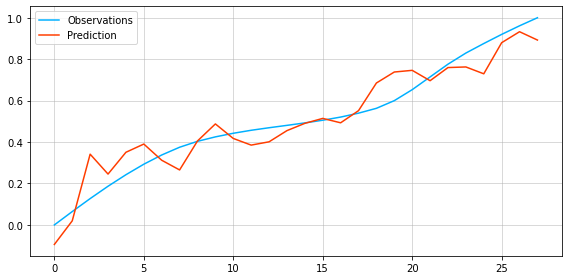

In [94]:
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
y_pred = model.predict(X)
plt.figure(figsize=(8,4))
plt.plot(label_train,color='#00b0ff',label="Observations",linewidth=1.5)
plt.plot(y_pred,color='#ff3d00',label="Prediction",linewidth=1.5)
plt.legend(loc="upper left")
plt.grid(alpha=0.6)
plt.tight_layout()

In [100]:
#模型的残差
error = model.resid
error

array([ 0.09428568,  0.04465414, -0.21444042, -0.0587535 , -0.10831222,
       -0.09727495,  0.02532471,  0.10954682, -0.00179527, -0.06248013,
        0.02503587,  0.07156205,  0.06791517,  0.02535933,  0.00216414,
       -0.00879485,  0.02767321, -0.01208416, -0.12223141, -0.13819569,
       -0.09324979,  0.01822191,  0.01628785,  0.06711911,  0.14613994,
        0.04004537,  0.02859298,  0.10768412])

# 多重共线性检验
## 方差膨胀系数（VIF）
- 通常以10作为判断边界。
  - 当VIF<10,不存在多重共线性；
  - 当10<=VIF<100,存在较强的多重共线性；
  - 当VIF>=100, 存在严重多重共线性。

1. 多重共线性是普遍存在的，轻微的多重共线性问题可不采取措施。 
2. 严重的多重共线性问题，一般可根据经验或通过分析回归结果发现。如影响系数符号，重要的解释变量t值很低。要根据不同情况采取必要措施。
3. 如果模型仅用于预测，则只要拟合程度好，可不处理多重共线性问题，存在多重共线性的模型用于预测时，往往不影响预测结果。


In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(factor_train.shape[1]):
    print(variance_inflation_factor(factor_train,i))

5.147732881666058
11.903493872882112
11.291520889344524


In [113]:
from statsmodels.stats.diagnostic import spec_white
# 异方差检验
X=factor_train
X=sm.add_constant(X) # 添加截距项
error = model.resid  #模型的残差

spec_white(error,X)
print("P值为 0.28741496073841477，接受原假设，不存在异方差性")

(10.831796044639631, 0.28741496073841477, 9)

In [118]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
# 自相关性检验
acorr_breusch_godfrey(model)
print("P值为1.87，接受原假设，不存在自相关性")

P值为1.87，接受原假设，不存在自相关性
